In [2]:
import numpy as np

log = open(r'outputs/3D-Front/train/2023-08-03/01-06-38/main.log', 'r').readlines()
print(len(log))

2379


In [7]:
val_loss_str = lambda x: f"best val loss ({x!s})"
val_loss_str('total')

'best val loss (total)'

In [39]:
val_loss_str = lambda x: f"best val loss ({x!s})"

def extract_val_loss(file_path):
    epoch = 0
    epoch_list = []
    keys = ['total', 'frustum_loss', 'box_cls_loss', 'box_loss', 
            'mask_loss', 'edge_loss', 'completeness_loss']     
    val_stats = dict((k, []) for k in keys)
    loss_stored = False
    with open(file_path, 'r') as f:
        for line in f.readlines():
            if 'Epoch (' in line:
                epoch = int(line.split('/')[0].split('(')[-1])
            val_stats, epoch_list = extract_val_loss_from_line(line, 
                                                               val_stats, 
                                                               epoch, 
                                                               epoch_list)
    return epoch_list, val_stats
                
def extract_val_loss_from_line(line:str, 
                               val_stats:dict, 
                               epoch:int, 
                               epoch_list:list):
    for key in val_stats.keys():
        if val_loss_str(key) in line:
            val_stats[key].append(extract_value_from_line(line))
            if key == 'completeness_loss':
                epoch_list.append(epoch)
    
    return val_stats, epoch_list


def extract_value_from_line(line):
    return float(line.rstrip().split(' ')[-1])

epoch_list, val_loss_stats = extract_val_loss('outputs/3D-Front/train/2023-08-03/01-06-38/main.log')
len(epoch_list), list(map(len, val_loss_stats.values()))

(19, [19, 19, 19, 19, 19, 19, 19])

In [68]:
epoch_1, val_loss_1 = extract_val_loss('outputs/3D-Front/train/2023-08-03/14-49-34/main.log')
epoch_2, val_loss_2 = extract_val_loss('outputs/3D-Front/train/2023-08-02/19-42-00/main.log')
epoch_01, val_loss_01 = extract_val_loss('outputs/3D-Front/train/2023-08-02/22-31-43/main.log')
epoch_0, val_loss_0 = extract_val_loss('outputs/3D-Front/train/2023-07-30/15-32-46/main.log')

In [71]:
epoch_1

[0, 2, 3, 4, 11, 12, 13, 14, 15, 16, 25, 26, 32, 33, 34, 35, 48]

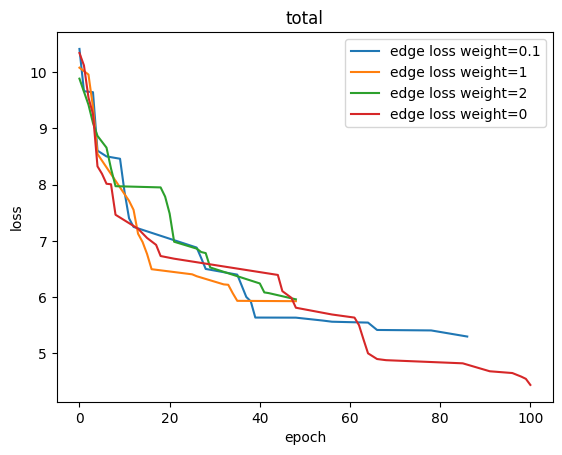

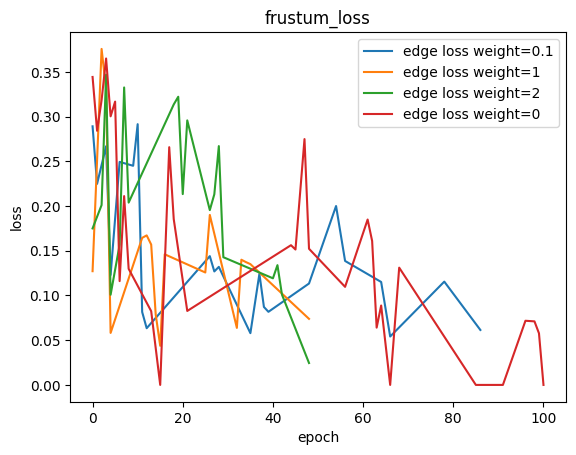

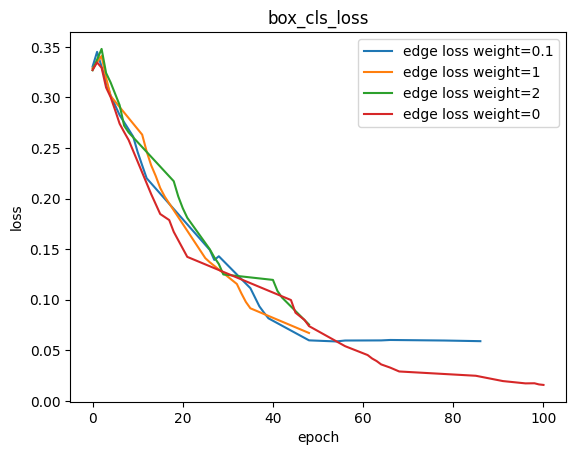

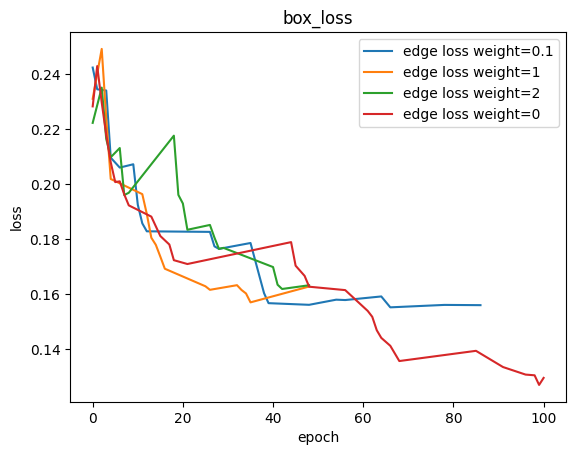

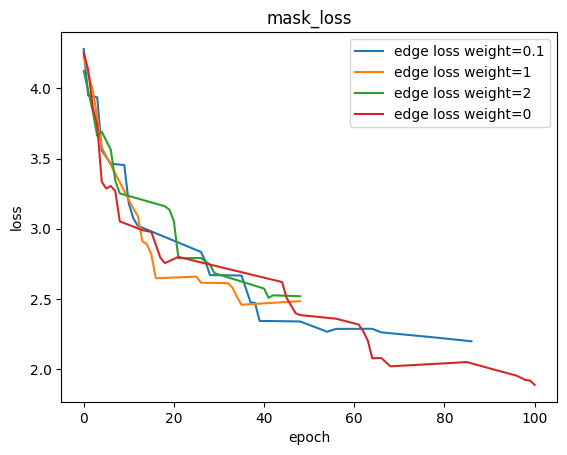

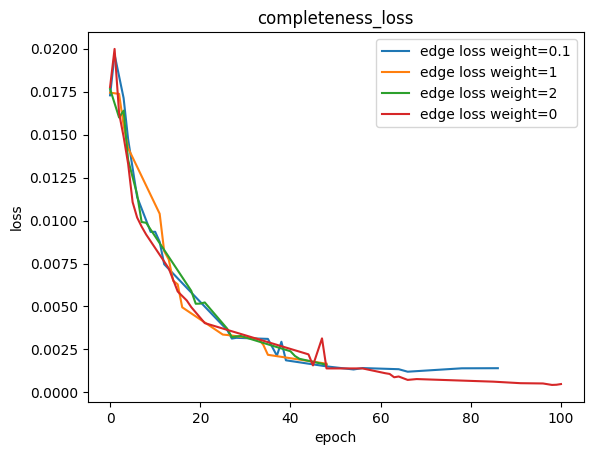

ValueError: x and y must have same first dimension, but have shapes (31,) and (0,)

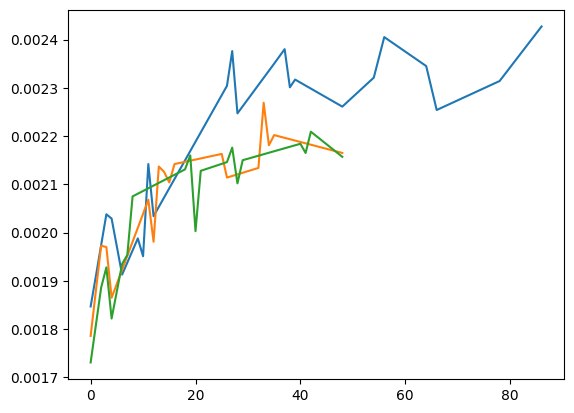

In [73]:
import matplotlib.pyplot as plt

def plot_key_loss(key):
    plt.plot(epoch_01, val_loss_01[key] ,label='01')
    plt.plot(epoch_1, val_loss_1[key] ,label='1')
    plt.plot(epoch_2, val_loss_2[key], label='2')
    plt.plot(epoch_0[:31], val_loss_0[key][:31], label='0')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(key)
    plt.legend(['edge loss weight=0.1',
                'edge loss weight=1', 
                'edge loss weight=2', 
                'edge loss weight=0'])
    plt.show()

keys = ['total', 'frustum_loss', 'box_cls_loss', 'box_loss', 
            'mask_loss', 'completeness_loss', 'edge_loss'] 
[plot_key_loss(key) for key in keys]

In [40]:
import glob
all_main_logs = glob.glob('outputs/3D-Front/train/*/*/main.log')
len(all_main_logs), all_main_logs[0]

(81, 'outputs/3D-Front/train/2023-07-28/00-13-51/main.log')